<a href="https://colab.research.google.com/github/antoreep-jana/YouTube_Code_Repositories/blob/main/Weekly%20Sessions/Weekly_Session_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UNET Architecture

In [ ]:
import tensorflow as tf

from tensorflow.keras.utils import plot_model

In [ ]:
inp = tf.keras.layers.Input(shape = (572, 572,1))

conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', kernel_initializer='he_uniform')(inp)
conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', kernel_initializer='he_uniform')(conv1)

print(conv1.shape)

pool1 = tf.keras.layers.MaxPooling2D((2,2))(conv1)
print(pool1.shape)

conv2 = tf.keras.layers.Conv2D(128, 3, activation=  'relu', kernel_initializer='he_uniform')(pool1)
conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', kernel_initializer='he_uniform')(conv2)

pool2 = tf.keras.layers.MaxPooling2D((2,2))(conv2)

print(pool2.shape)

conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', kernel_initializer='he_uniform')(pool2)
conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', kernel_initializer='he_uniform')(conv3)

pool3 = tf.keras.layers.MaxPooling2D((2,2))(conv3)

print(pool3.shape)

conv4 = tf.keras.layers.Conv2D(512, 3, activation= 'relu', kernel_initializer='he_uniform')(pool3)
conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', kernel_initializer='he_uniform')(conv4)

pool4 = tf.keras.layers.MaxPooling2D((2,2))(conv4)

print(pool4.shape)

conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', kernel_initializer='he_uniform')(pool4)
conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', kernel_initializer='he_uniform')(conv5)

print(conv5.shape)


up1 = tf.keras.layers.Conv2D(512, 2, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')(tf.keras.layers.UpSampling2D((2,2))(conv5))
crop1 = tf.keras.layers.Cropping2D((4,4))(conv4)
print(up1.shape)
print(crop1.shape)
merge1 = tf.keras.layers.concatenate([crop1, up1], axis = -1)

conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', kernel_initializer='he_uniform')(merge1)
conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', kernel_initializer='he_uniform')(conv6)


up2 = tf.keras.layers.Conv2D(256, 2, padding = 'same',  activation = 'relu', kernel_initializer='he_uniform')(tf.keras.layers.UpSampling2D((2,2))(conv6))
crop2 = tf.keras.layers.Cropping2D((16,16))(conv3)

merge2 = tf.keras.layers.concatenate([crop2, up2], axis = -1)

conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', kernel_initializer='he_uniform')(merge2)
conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', kernel_initializer='he_uniform')(conv7)

up3 = tf.keras.layers.Conv2D(128, 2, padding = 'same', activation = 'relu', kernel_initializer='he_uniform')(tf.keras.layers.UpSampling2D((2,2))(conv7))
crop3 = tf.keras.layers.Cropping2D((40,40))(conv2)

merge3 = tf.keras.layers.concatenate([crop3, up3], axis = -1)

conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', kernel_initializer='he_uniform')(merge3)
conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', kernel_initializer='he_uniform')(conv8)

up4 = tf.keras.layers.Conv2D(64, 2,padding = 'same',  activation = 'relu', kernel_initializer='he_uniform')(tf.keras.layers.UpSampling2D((2,2))(conv8))
crop4 = tf.keras.layers.Cropping2D((88,88))(conv1)

merge4 = tf.keras.layers.concatenate([crop4, up4], axis = -1)

conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', kernel_initializer='he_uniform')(merge4)
conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', kernel_initializer='he_uniform')(conv9)

output = tf.keras.layers.Conv2D(2, (1,1), kernel_initializer='he_uniform')(conv9)


model = tf.keras.models.Model(inputs = inp, outputs = output)











(None, 568, 568, 64)
(None, 284, 284, 64)
(None, 140, 140, 128)
(None, 68, 68, 256)
(None, 32, 32, 512)
(None, 28, 28, 1024)
(None, 56, 56, 512)
(None, 56, 56, 512)


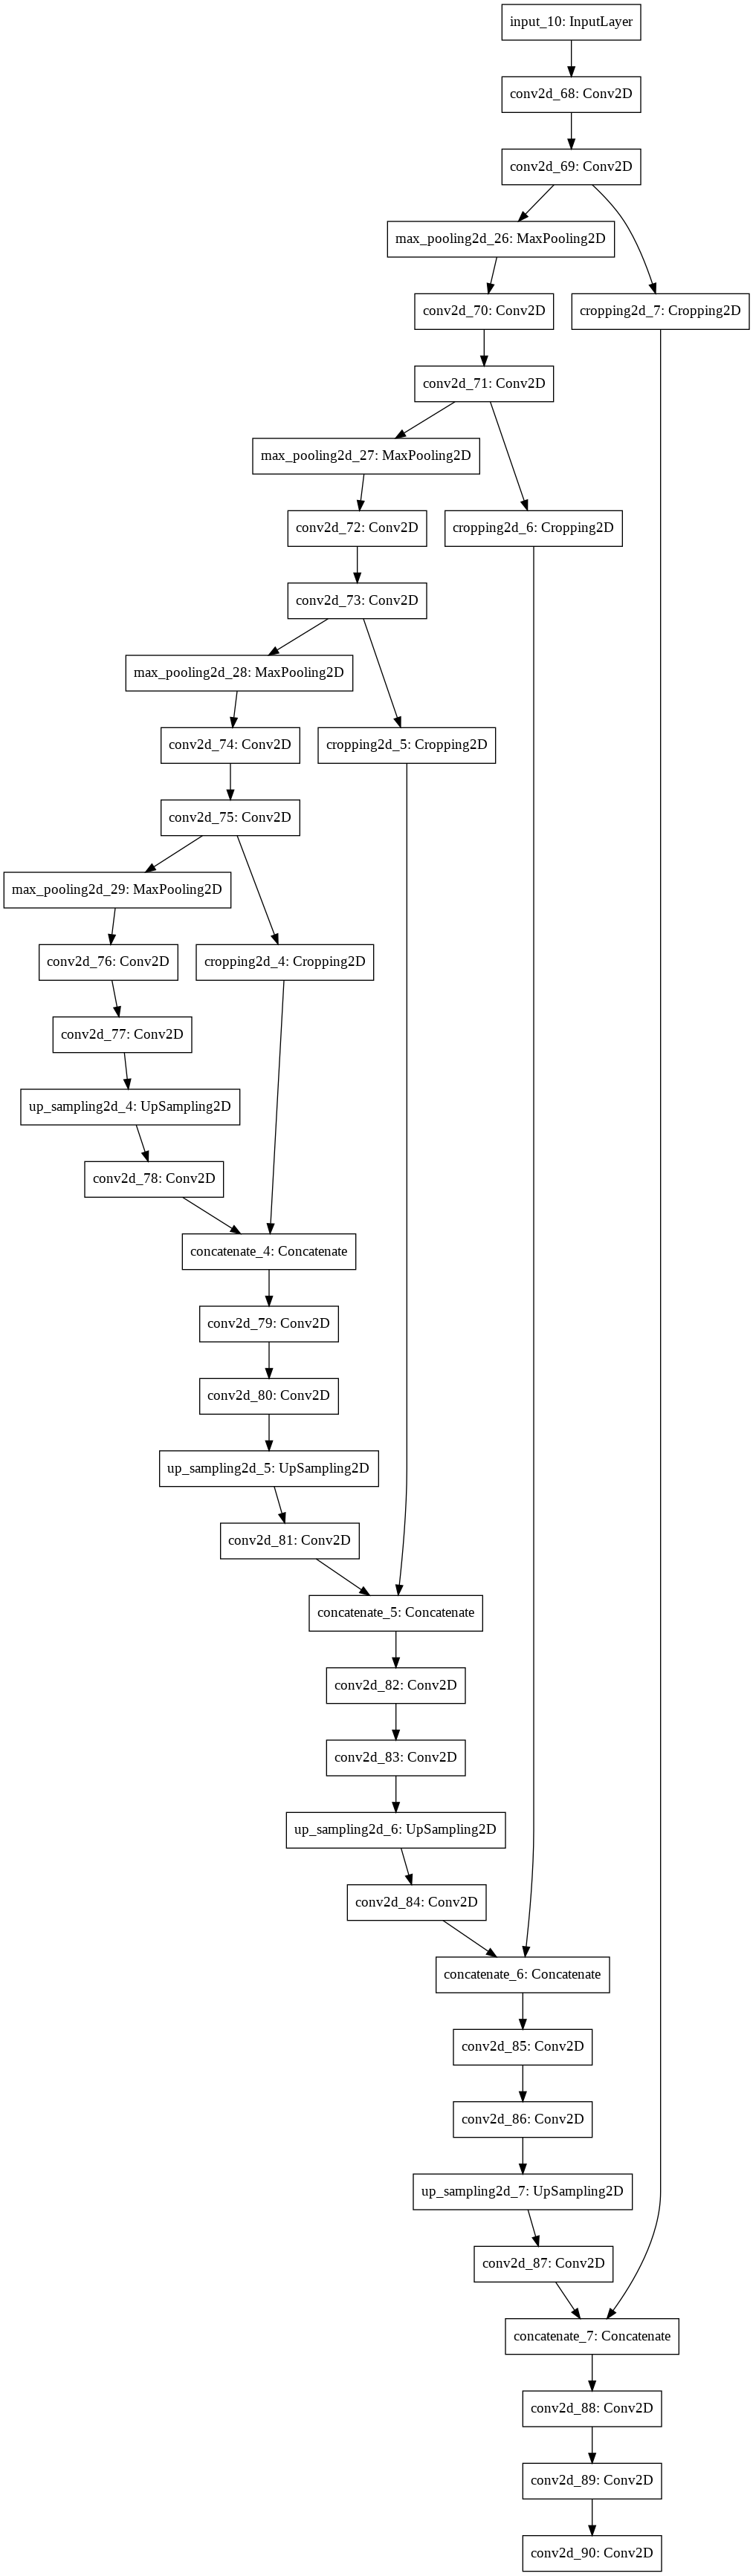

In [ ]:
plot_model(model)